## 🧹 Data Preprocessing & EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, FastICA

In [3]:
data = pd.read_csv("Copy of sonar data.csv", header=None)
print("Shape of dataset:", data.shape)
print("First few rows:\n", data.head())

Shape of dataset: (208, 61)
First few rows:
        0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  

In [4]:
data[60] = data[60].map({'R': 0, 'M': 1})
print("Missing values:\n", data.isnull().sum())

Missing values:
 0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


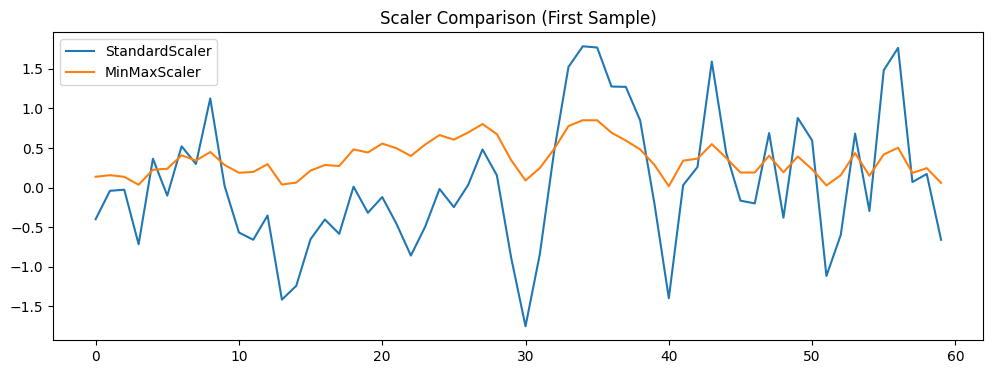

In [5]:
features = data.drop(60, axis=1)
sc1 = StandardScaler().fit_transform(features)
sc2 = MinMaxScaler().fit_transform(features)

plt.figure(figsize=(12, 4))
plt.plot(sc1[0], label='StandardScaler')
plt.plot(sc2[0], label='MinMaxScaler')
plt.title("Scaler Comparison (First Sample)")
plt.legend()
plt.show()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

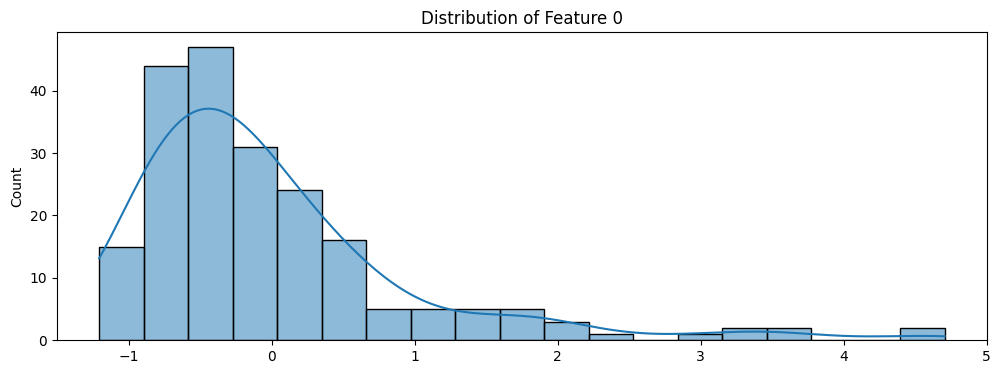

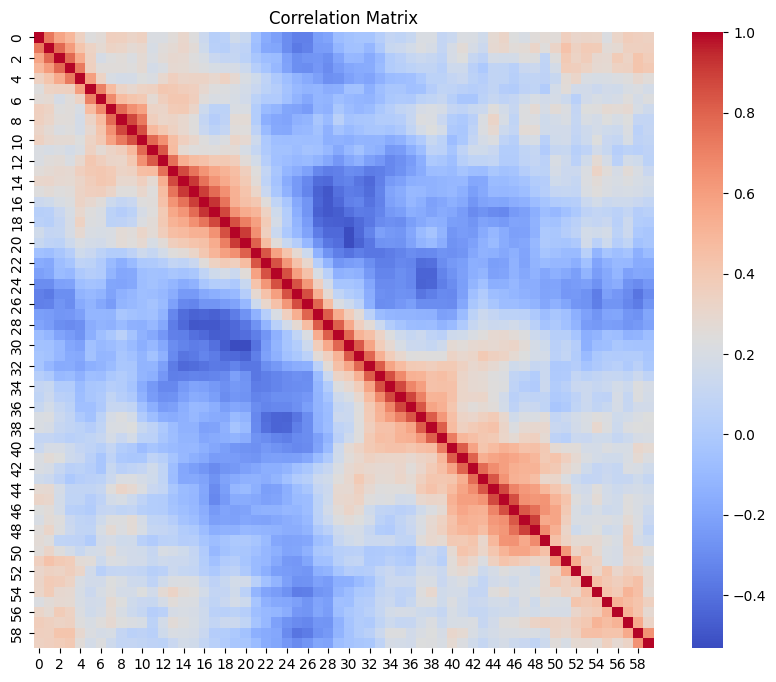

In [6]:
plt.figure(figsize=(12, 4))
sns.histplot(scaled_features[:, 0], kde=True)
plt.title("Distribution of Feature 0")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, :-1].corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

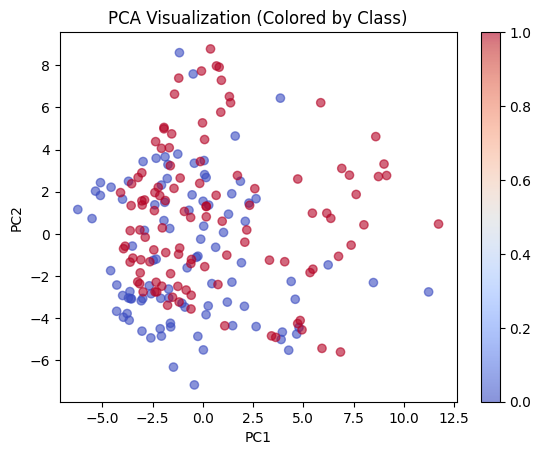

In [7]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.scatter(components[:, 0], components[:, 1], c=data[60], cmap='coolwarm', alpha=0.6)
plt.title("PCA Visualization (Colored by Class)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

## ⚙️Baseline Models & Evaluation

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data[60], test_size=0.2, random_state=42)


k-NN Results:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.96      0.85      0.90        26

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



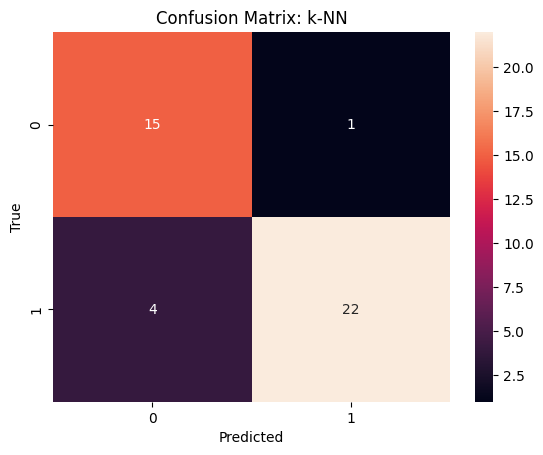


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.60      0.94      0.73        16
           1       0.94      0.62      0.74        26

    accuracy                           0.74        42
   macro avg       0.77      0.78      0.74        42
weighted avg       0.81      0.74      0.74        42



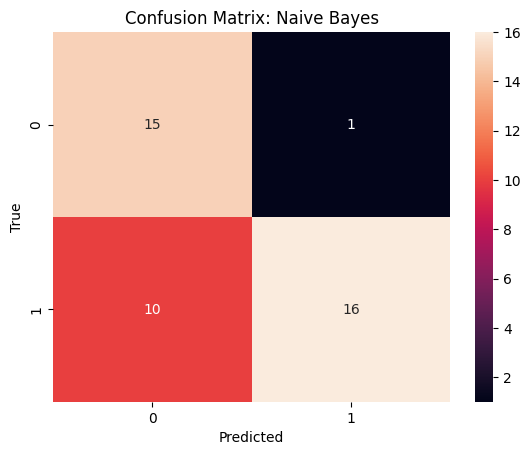


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.77      0.65      0.71        26

    accuracy                           0.67        42
   macro avg       0.66      0.67      0.66        42
weighted avg       0.69      0.67      0.67        42



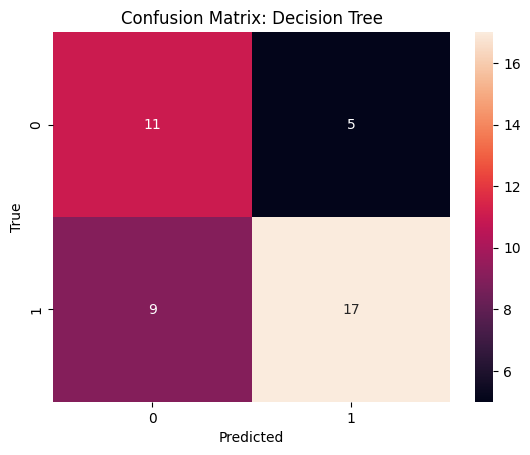

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test, preds))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

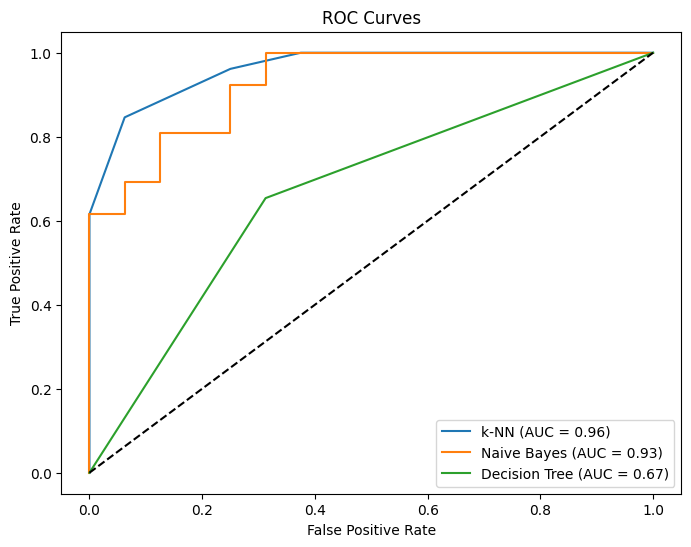

In [10]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## 🤖 SVM & Neural Network

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid.fit(X_train, y_train)

preds = grid.predict(X_test)
print("\nBest SVM Params:", grid.best_params_)
print(classification_report(y_test, preds))


Best SVM Params: {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.96      0.88      0.92        26

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(60, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

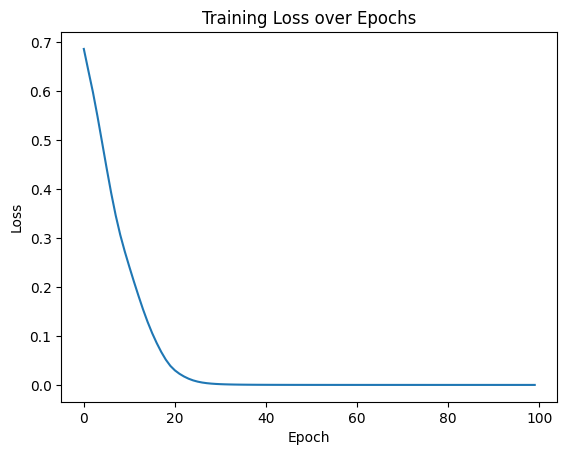

In [13]:
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 🔍 Unsupervised Learning

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
k_labels = kmeans.fit_predict(scaled_features)

print("Adjusted Rand Index:", adjusted_rand_score(data[60], k_labels))
print("Silhouette Score:", silhouette_score(scaled_features, k_labels))

Adjusted Rand Index: -0.004435668131396444
Silhouette Score: 0.12788142983448755


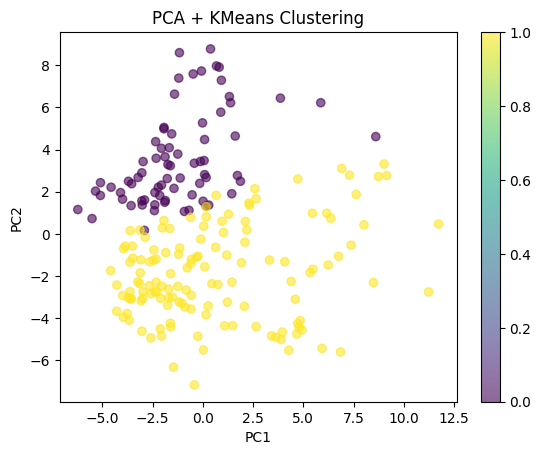

In [15]:
plt.scatter(components[:, 0], components[:, 1], c=k_labels, cmap='viridis', alpha=0.6)
plt.title("PCA + KMeans Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

## 🧾Structuring & Reporting

In [16]:
from sklearn.metrics import classification_report

def build_pipeline(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    report = classification_report(y_test, preds, output_dict=True)
    return report

In [17]:
import argparse

def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('--model', type=str, default='knn')
    args = parser.parse_args(args=[])  # Jupyter safe
    print("Model selected:", args.model)

if __name__ == "__main__":
    main()

Model selected: knn


# Final Report
- ✅ Problem Statement
- ✅ Contributor Roles
- ✅ Method Summary
- ✅ Performance Comparison Table
- ✅ Insights & Future Work